# Watershed segmentation of hepatocytes
This step uses parasite masks. The pixels that belong to parasites according to the parasite masks are set to 0, that way they are not segmented when we are looking for hepatocytes.

In [1]:
# First we do the required imports
import sys
import os
sys.path.append(os.path.sep + os.path.join(*(os.path.abspath('').split(os.path.sep)[:next((i for i in range(len(os.path.abspath('').split(os.path.sep)) -1, -1, -1) if 'LiverStagePipeline' in os.path.abspath('').split(os.path.sep)[i]), None)+1])))

from segmentation.conventional import cell_watershed
from utils import cell_viewer

In [2]:
img_folder = '/mnt/DATA1/anton/data/unformatted/high_res_subset_from_Felix/F10_GS-HSP' # folder containing images
parasite_mask_folder = '/mnt/DATA1/anton/data/unformatted/high_res_subset_from_Felix/F10_GS-HSP_watershed_test' # folder containing parasite masks
hepatocyte_mask_folder = '/mnt/DATA1/anton/data/unformatted/high_res_subset_from_Felix/F10_GS-HSP_watershed_test_hepatocytes' # folder to store hepatocyte masks in

Let's inspect the images again to see which channel contain the hepatocytes

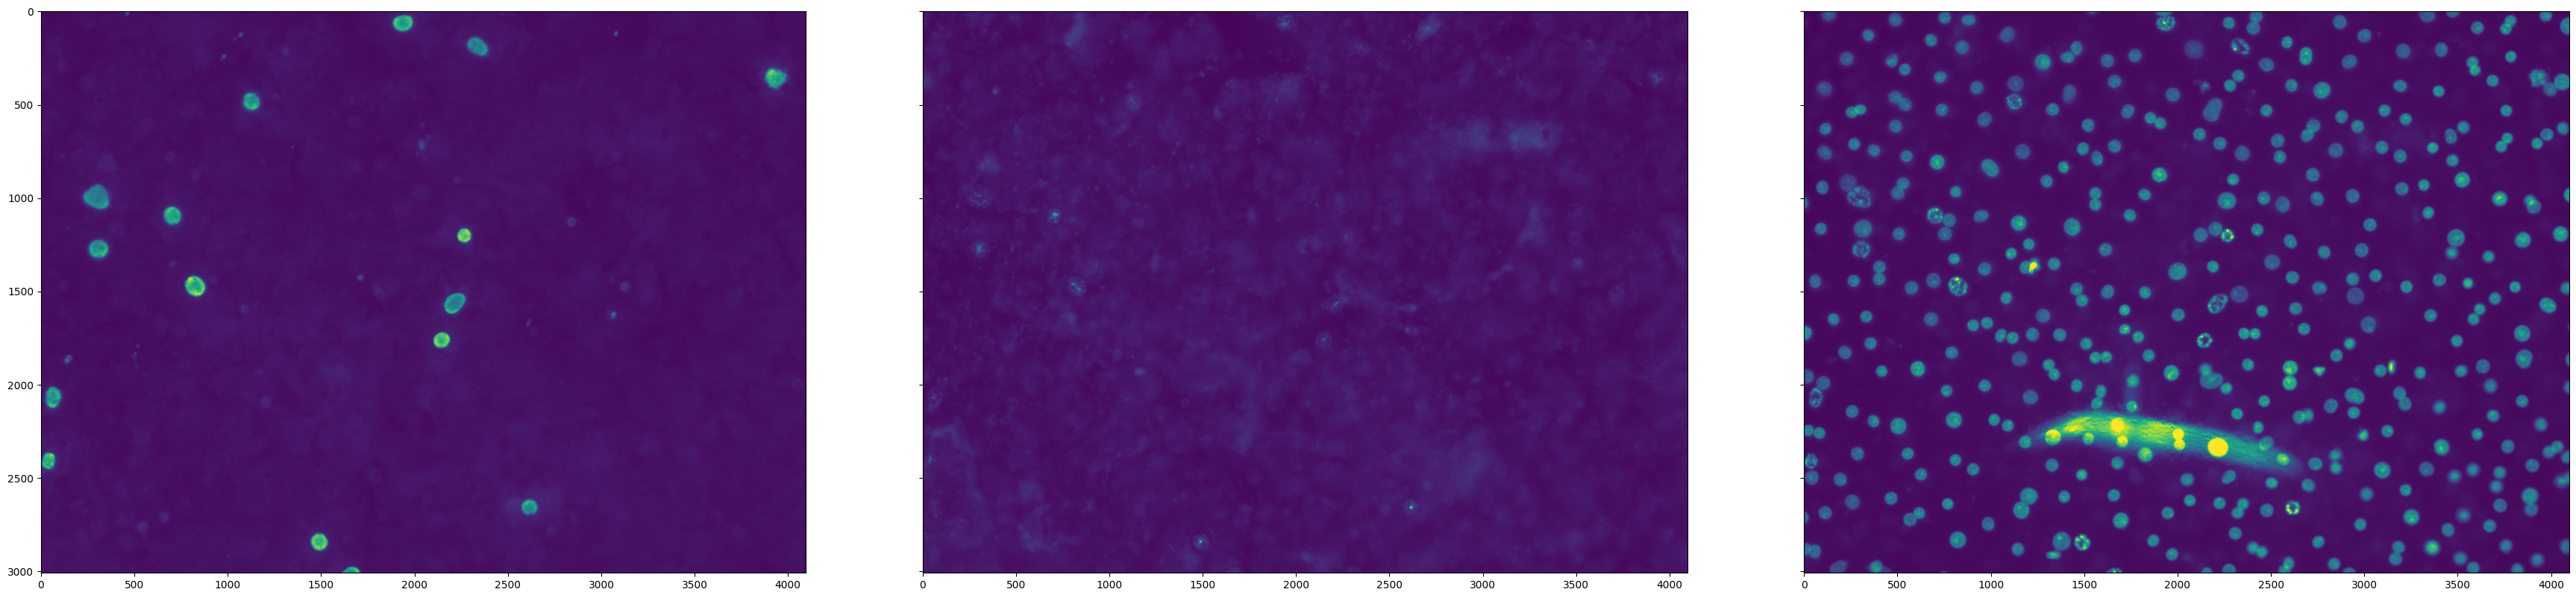

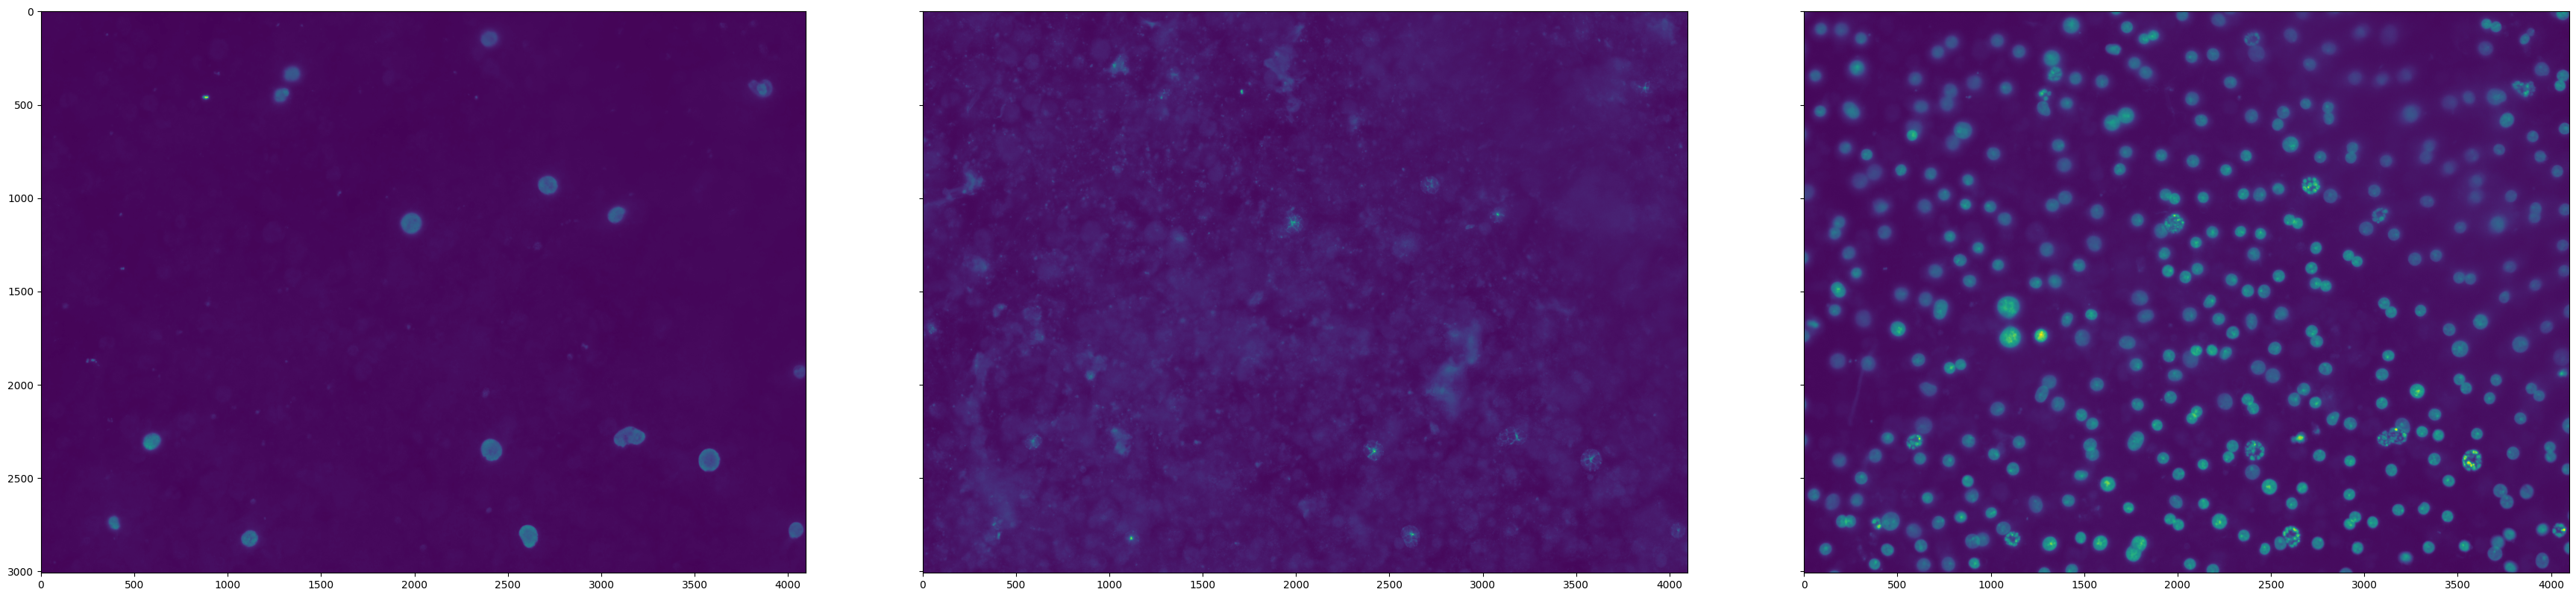

In [3]:
cell_viewer.show_folder(tif_dir=img_folder, num_images=2, colormaps=None)

In [4]:
hepatocyte_channel = 2 # channel the hepatocytes occur in, when counting from 0
cell_watershed.segment_cells_in_folder(image_folder=img_folder, segmentation_folder=hepatocyte_mask_folder, parasite_mask_folder=parasite_mask_folder, threads=40, channel=hepatocyte_channel, resize_shape=None, normalize=True, equalize_adapthist=24)

Now to view the results. First mask are parasites, second mask are hepatocytes:

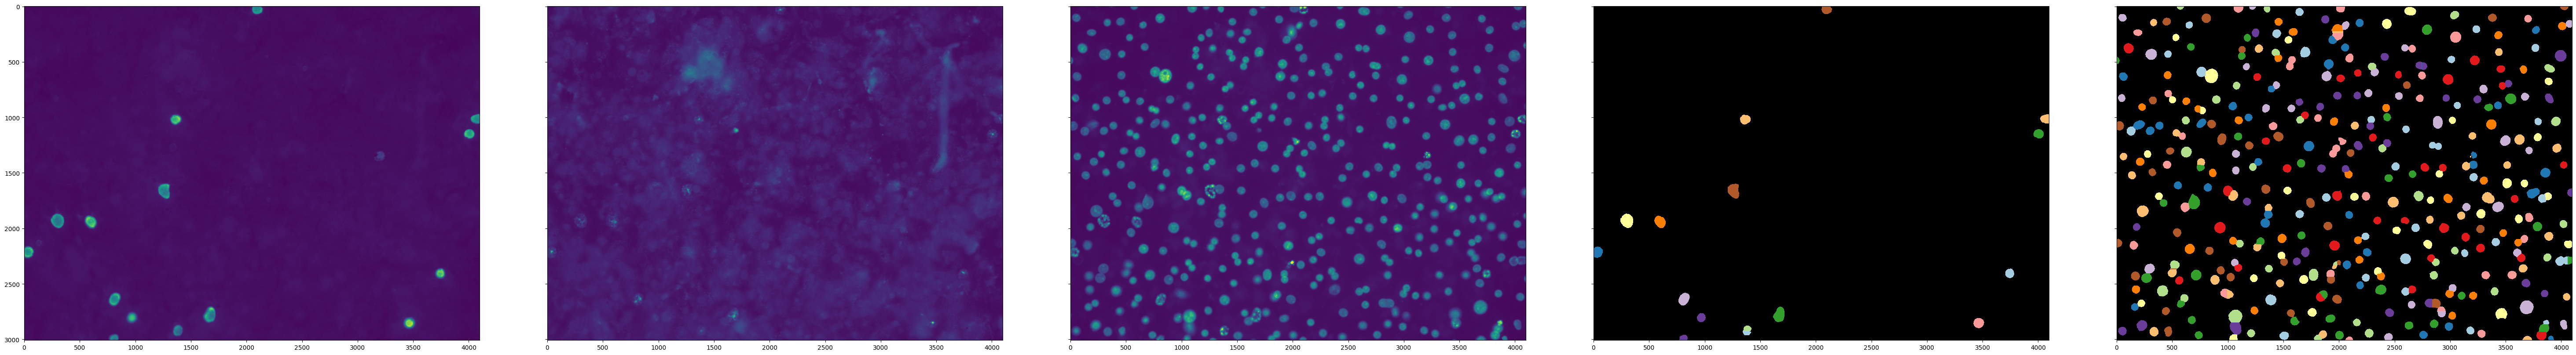

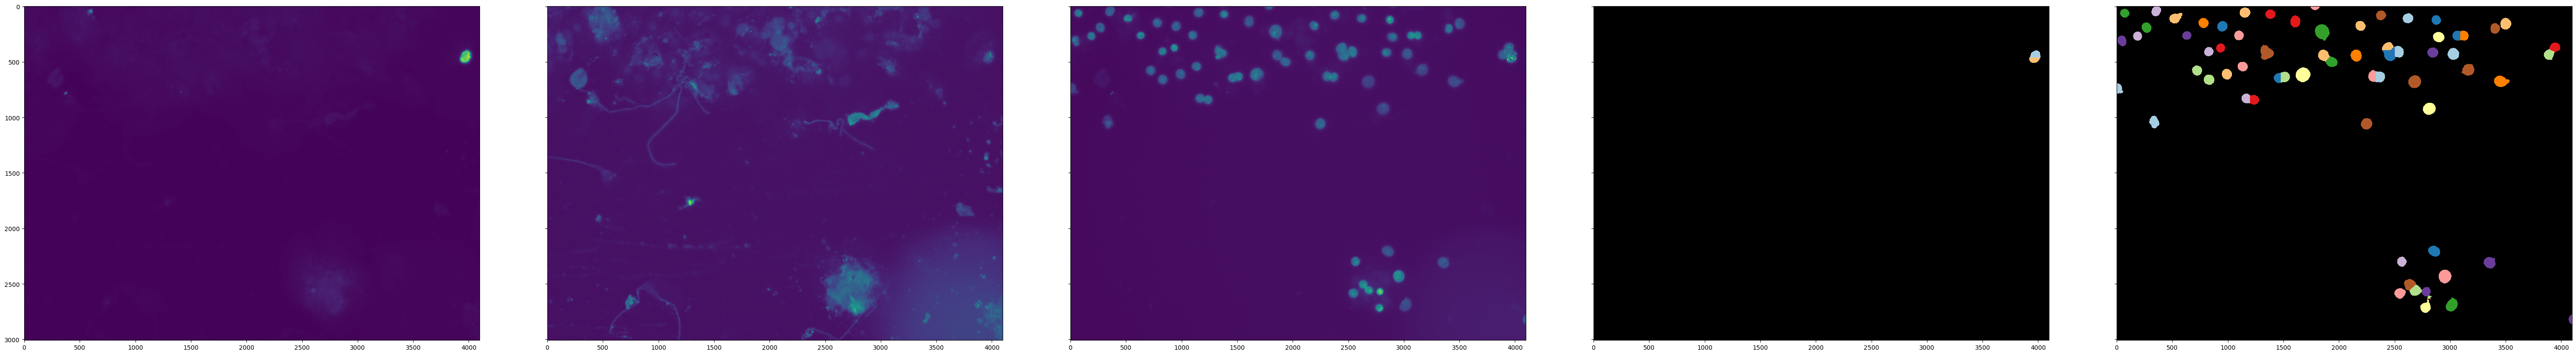

In [5]:
cell_viewer.show_folder(tif_dir=img_folder, seg_dirs=[parasite_mask_folder, hepatocyte_mask_folder], eval=False, num_rows=1, num_images=2)